### <CENTER>CONSUMER BEHAVIOUR PROJECT

### 
THIS IS A CLASSIFICATION TYPE PROJECT WHICH DEALING WITH CONSUMER BEHAVIOUR

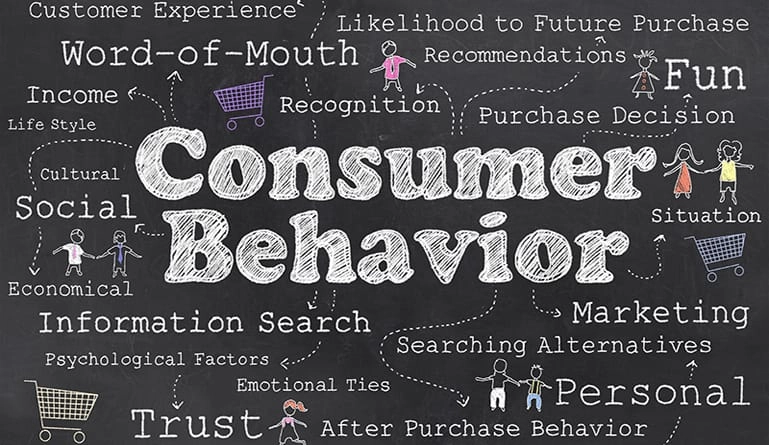

   ### DATASET DESCRIPTION
#### 
The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - whether the customer decided to buy specific products or not.

source:kaggle

### 
LOADING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import klib as k
from mpl_toolkits.mplot3d import Axes3D
import os
import plotly.express as px
import plotly.io as pio
import itertools
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("Customer_Behaviour.csv")


### EDA

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
k.clean_column_names(df)

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='gender', ylabel='count'>

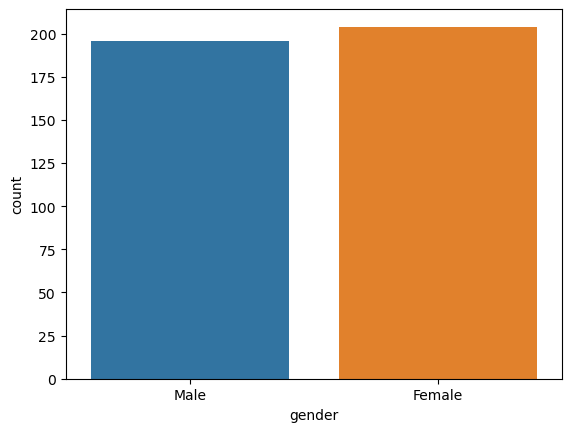

In [6]:
sns.countplot(x="gender", data=df)

In [7]:
k.corr_mat(df)

,user_id,age,estimated_salary,purchased
user_id,1.00,-0.00,0.07,0.01
age,-0.00,1.00,0.16,0.62
estimated_salary,0.07,0.16,1.00,0.36
purchased,0.01,0.62,0.36,1.00


<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

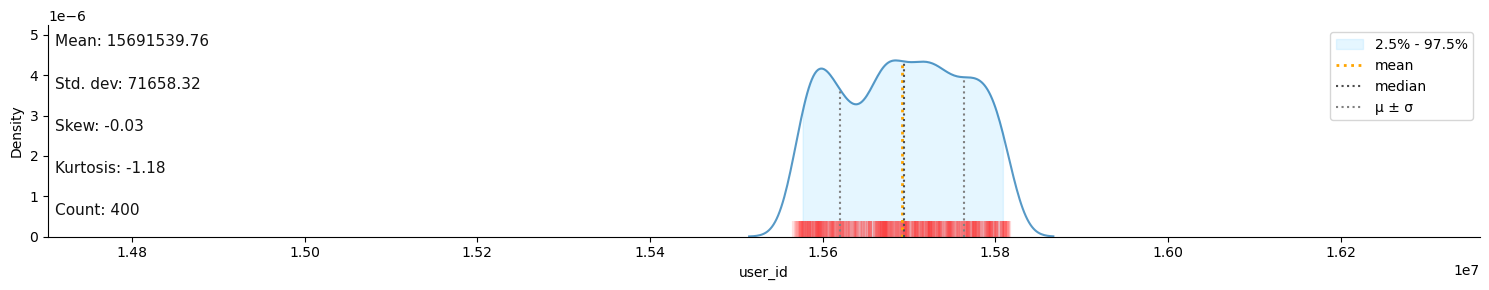

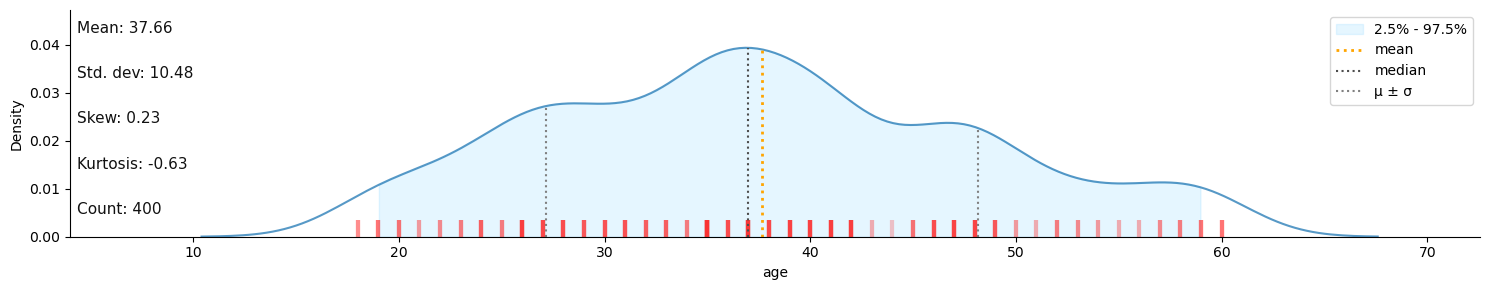

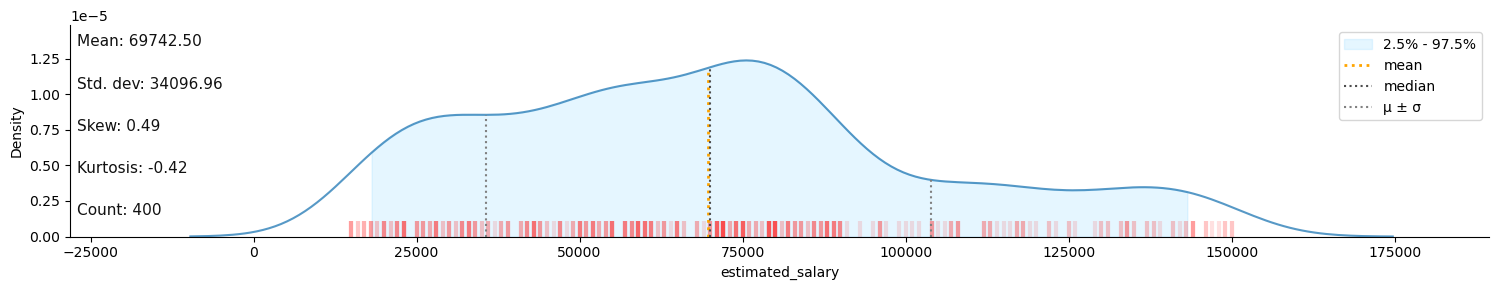

In [8]:
k.dist_plot(df)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           400 non-null    int64 
 1   gender            400 non-null    object
 2   age               400 non-null    int64 
 3   estimated_salary  400 non-null    int64 
 4   purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### CATAGORICAL PLOT

GridSpec(6, 1)

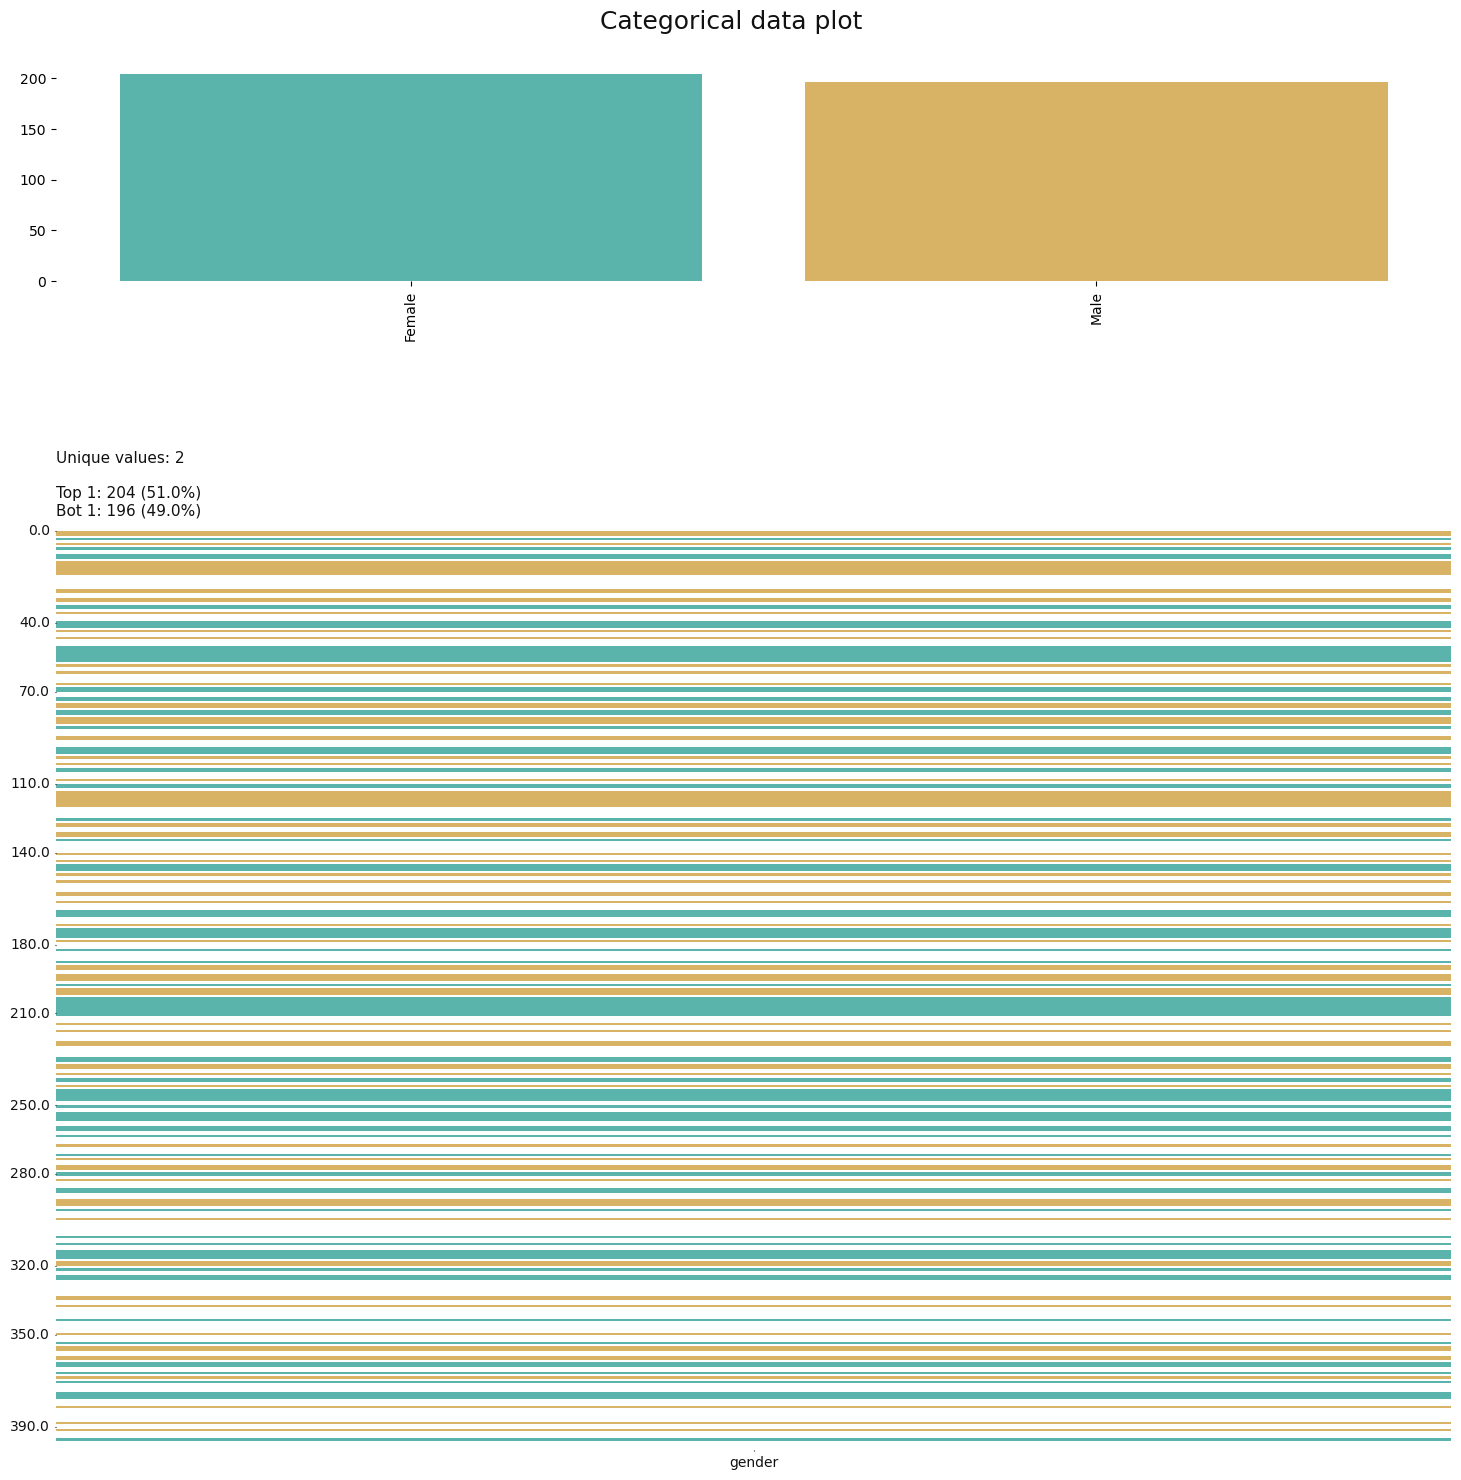

In [12]:
k.cat_plot(df)

### HISTOGRAM

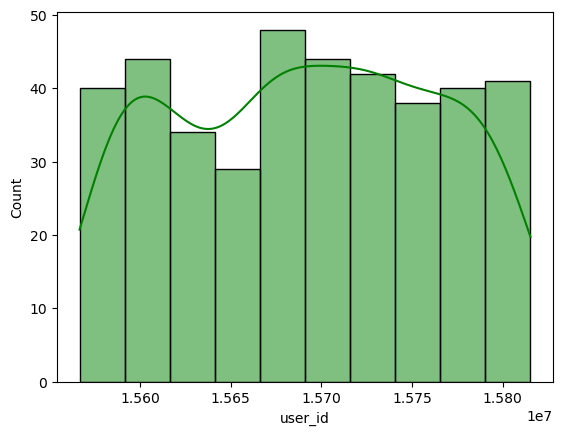

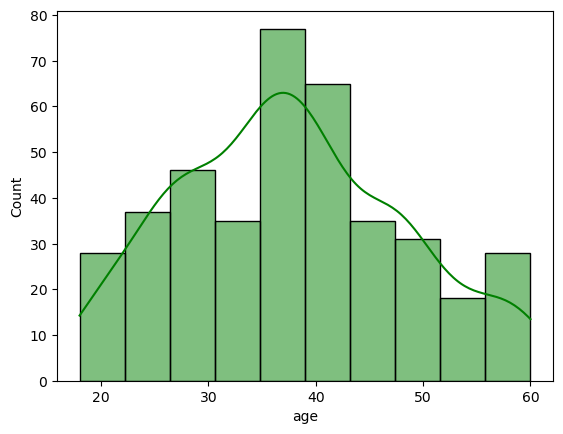

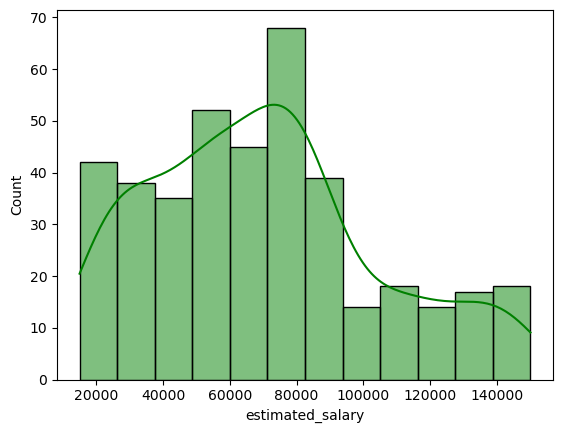

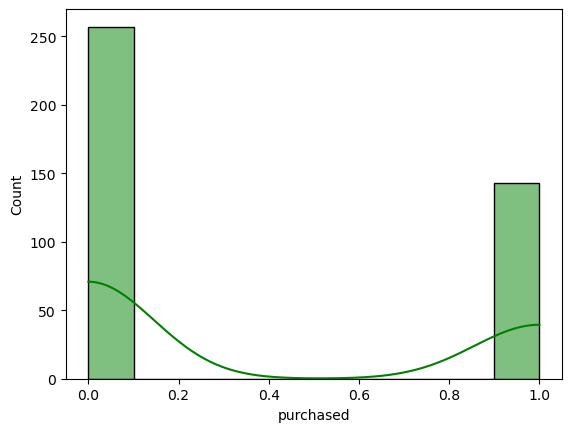

In [13]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="green")
        plt.show()

In [14]:
df.describe()

,user_id,age,estimated_salary,purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### BOXPLOT

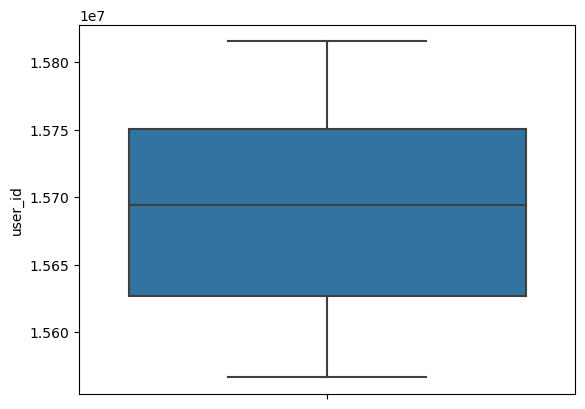

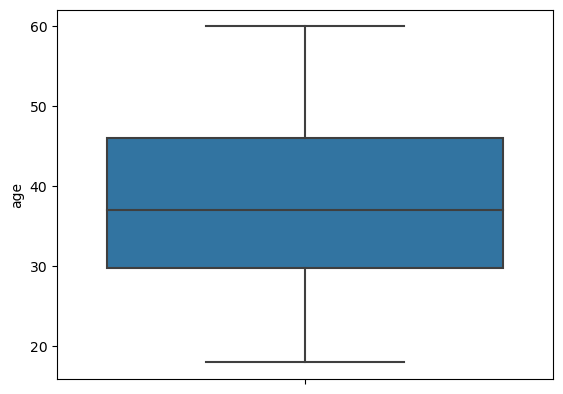

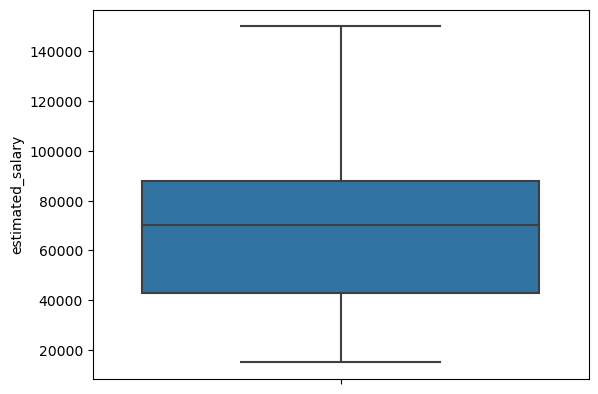

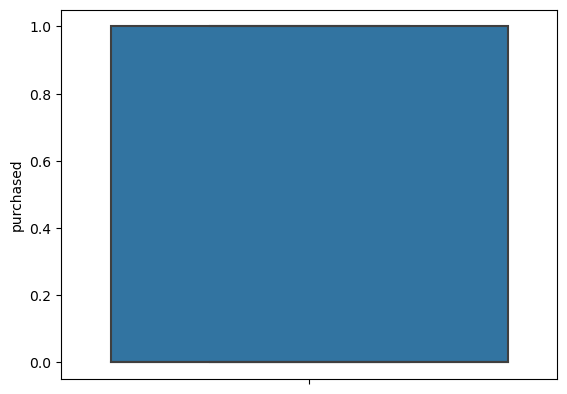

In [15]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [16]:
df.isnull().mean()*100

user_id             0.0
gender              0.0
age                 0.0
estimated_salary    0.0
purchased           0.0
dtype: float64

In [17]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [18]:
df

,user_id,gender,age,estimated_salary,purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           400 non-null    int64
 1   gender            400 non-null    int32
 2   age               400 non-null    int64
 3   estimated_salary  400 non-null    int64
 4   purchased         400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


### CORRELATION MATRIX

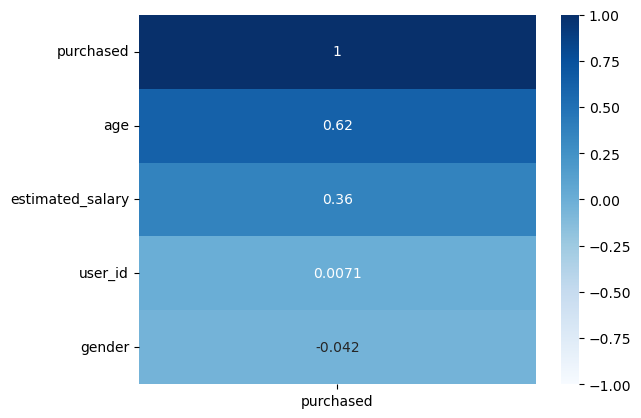

In [20]:
sns.heatmap(df.corr()[["purchased"]].sort_values(by="purchased", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

### CLASSIFICATION

In [21]:
x = df.drop(columns=["purchased"])

In [22]:
y=df["purchased"]

In [23]:
sc=StandardScaler()

In [24]:
x= sc.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)


In [26]:
models = {
    "LogisticRegression": LogisticRegression(),
  "Ridge":RidgeClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()  
}

In [27]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE RMSE:  0.37679064684932617
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.380005047134093
****************************************************************************************************
cross validation model : SVC
AVERAGE RMSE:  0.2883500942412876
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE RMSE:  0.3936287346912918
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE RMSE:  0.27302293227779
****************************************************************************************************
cross validation model : AdaBoostClassifier
AVERAGE RMSE:  0.37631010671634624
********************************************

In [28]:
model=RandomForestClassifier()
model.fit(x_train, y_train)

print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)



model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.95
confusion_matrix train is::  [[199   0]
 [  0 121]]
confusion_matrix test is::  [[55  3]
 [ 1 21]]
Wrong Predictions made: 4 / 80
************************************************************


In [32]:
y_pred=model.predict(x)

<AxesSubplot:>

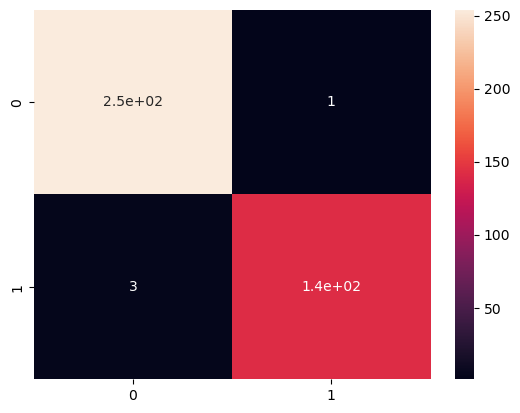

In [33]:
sns.heatmap(confusion_matrix(y_pred,y),annot=True)

In [29]:
op= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)


Model used is::  RandomForestClassifier()


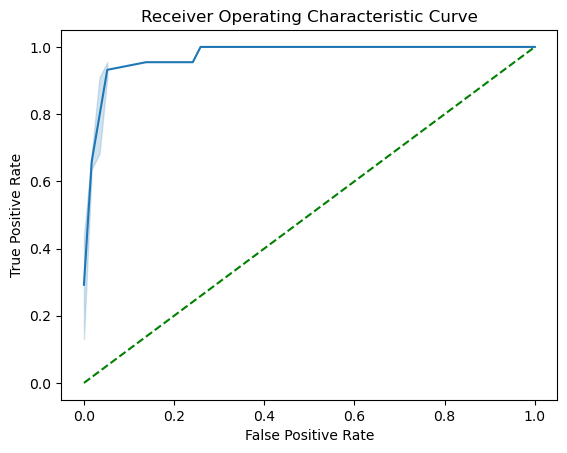

In [30]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("Model used is:: ", model)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

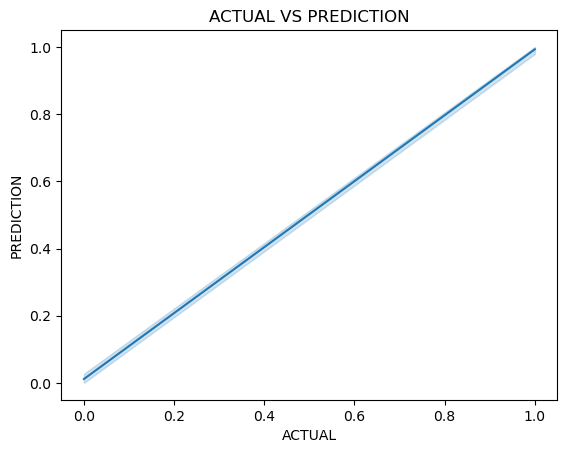

In [31]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=op)
plt.title('ACTUAL VS PREDICTION')
plt.show()

### CONCLUTION
####  
we can conclude that we have training accuracy of 100% with the RandomForestClassifier
